In [13]:
import pandas as pd
import numpy as np
import pymongo
from pymongo import MongoClient
from pymongo.errors import ConnectionFailure, OperationFailure
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error


### Merge Crops Production datasets

I collected the crops production datasets from Our world in Data website which provide different kinds of crops data separately.

In [14]:
df_maize = pd.read_csv('productions/maize-production.csv')
df_millet = pd.read_csv('productions/millet-production.csv')
df_oat = pd.read_csv('productions/oat-production.csv')
df_rice = pd.read_csv('productions/rice-production.csv')
df_wheat = pd.read_csv('productions/wheat-production.csv')
df_barley = pd.read_csv('productions/barley-production.csv')
df_bean = pd.read_csv('productions/bean-production.csv')
df_pea = pd.read_csv('productions/dry-pea-production.csv')
df_mustard = pd.read_csv('productions/mustard-seed-production.csv')
df_seasame = pd.read_csv('productions/sesame-seed-production.csv')
df_sorghum = pd.read_csv('productions/sorghum-production.csv')
df_coffee = pd.read_csv('productions/coffee-production.csv')
df_soybean = pd.read_csv('productions/soybean-production.csv')
df_sunflower = pd.read_csv('productions/sunflower-seed-production.csv')
df_groundnu = pd.read_csv('productions/groundnut-production.csv')
df_lentil = pd.read_csv('productions/lentil-production.csv')
df_chickpea = pd.read_csv('productions/chickpea-production.csv')

### Creating Categories features for each type of grains 

Categroies new features is added in each dataset beofore merging and assinged the related name of grains.

In [16]:
df_maize['Categories'] = 'maize'
df_millet['Categories'] = 'millet'
df_oat['Categories'] = 'oat'
df_rice['Categories'] = 'rice'
df_wheat['Categories'] = 'wheat'
df_barley['Categories'] = 'barley'
df_bean['Categories'] = 'bean'
df_coffee["Categories"] = "coffee"
df_pea['Categories'] = 'pea'
df_mustard['Categories'] = 'mustand'
df_seasame['Categories'] = 'sesame seed'
df_sorghum['Categories'] = 'sorghum'
df_soybean['Categories'] = 'soybean'
df_sunflower['Categories'] = 'sunflower seed'
df_groundnu['Categories'] = 'groundnut'
df_lentil['Categories'] = 'lentil'
df_chickpea['Categories'] = 'chickpea'

In [17]:
df_production= pd.concat([df_maize, df_millet, df_oat, df_rice, df_wheat,df_barley, df_coffee, df_bean, df_pea, df_mustard, df_seasame, df_sorghum, df_soybean, df_sunflower, df_groundnu, df_lentil, df_chickpea ], ignore_index=True, axis=0 ,sort=False)

In [18]:
df_production.head()

,Country,Year,Production per capita (kg),Categories
0,Myanmar,1961,2.472357,maize
1,Myanmar,1962,2.923871,maize
2,Myanmar,1963,3.193012,maize
3,Myanmar,1964,2.249111,maize
4,Myanmar,1965,1.949489,maize


There are 1053 rows and 4 columns of crops production dataset after merging. 

In [19]:
df_production.shape

(1053, 4)

### Merge Used of land datasets

In [20]:
df_land_maize = pd.read_csv('land/maize.csv')
df_land_millet = pd.read_csv('land/millet.csv')
df_land_rice = pd.read_csv('land/rice.csv')
df_land_wheat = pd.read_csv('land/wheat.csv')
df_land_barley = pd.read_csv('land/barley.csv')
df_land_bean = pd.read_csv('land/dry-bean.csv')
df_land_pea = pd.read_csv('land/dry-pea.csv')
df_land_coffee = pd.read_csv('land/coffee.csv')
df_land_mustard = pd.read_csv('land/mustard.csv')
df_land_seasame = pd.read_csv('land/sesame.csv')
df_land_sorghum = pd.read_csv('land/sorghum.csv')
df_land_soybean = pd.read_csv('land/soybean.csv')
df_land_sunflower = pd.read_csv('land/sunflower.csv')
df_land_groundnu = pd.read_csv('land/groundnut.csv')
df_land_lentil = pd.read_csv('land/lentil.csv')
df_land_chickpea = pd.read_csv('land/chickpea.csv')

Categroies new features is added in each dataset beofore merging and assinged the related name of grains.

In [21]:
df_land_maize['Categories'] = 'maize'
df_land_millet['Categories'] = 'millet'
df_land_rice['Categories'] = 'rice'
df_land_wheat['Categories'] = 'wheat'
df_land_barley['Categories'] = 'barley'
df_land_bean['Categories'] = 'bean'
df_land_pea['Categories'] = 'pea'
df_land_mustard['Categories'] = 'mustand'
df_land_seasame['Categories'] = 'sesame seed'
df_land_coffee["Categories"] = "coffee"
df_land_sorghum['Categories'] = 'sorghum'
df_land_soybean['Categories'] = 'soybean'
df_land_sunflower['Categories'] = 'sunflower seed'
df_land_groundnu['Categories'] = 'groundnut'
df_land_lentil['Categories'] = 'lentil'
df_land_chickpea['Categories'] = 'chickpea'

In [22]:
df_land= pd.concat([df_land_maize, df_land_millet, df_land_rice, df_land_wheat,df_land_barley,df_land_coffee, df_land_bean, df_land_pea, df_land_mustard, df_land_seasame, df_land_sorghum, df_land_soybean, df_land_sunflower, df_land_groundnu, df_land_lentil, df_land_chickpea ], ignore_index=True, axis=0 ,sort=False)


In [23]:
df_land.head()

,Country,Year,Land Use per capita (m²),Categories
0,Myanmar,1961,30.563292,maize
1,Myanmar,1962,55.546113,maize
2,Myanmar,1963,42.844918,maize
3,Myanmar,1964,34.686418,maize
4,Myanmar,1965,32.694608,maize


There are 992 rows and 4 columns of crops production dataset after merging. 

In [24]:
df_land.shape

(992, 4)

### Connect MogoDB server 

In [25]:
try:
    # Connect to MongoDB server
    client = MongoClient("mongodb://localhost:27017/")
    db = client['myanmar_crops_db']  # Database name
    print("Connected to MongoDB successfully!")
except ConnectionFailure as e:
    print(f"Connection failed: {e}")
    exit()


Connected to MongoDB successfully!


#### Weather data Description 
NASA/POWER CERES/MERRA2 Native Resolution Monthly and Annual

Dates (month/day/year): 01/01/1984 through 12/31/2022

Location: Regional 

Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = na meters

The value for missing source data that cannot be computed or is outside of the sources availability range: -999

Parameter(s): 

QV2M            MERRA-2 Specific Humidity at 2 Meters (g/kg)

T2M_MAX         MERRA-2 Temperature at 2 Meters Maximum (C)

T2M_MIN         MERRA-2 Temperature at 2 Meters Minimum (C)

WS2M_MAX        MERRA-2 Wind Speed at 2 Meters Maximum (m/s)

WS2M_MIN        MERRA-2 Wind Speed at 2 Meters Minimum (m/s)

PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/day)


The weather dataset is used in this project obtained from NASA/POWER CERES/MERRA2 which provides average monthly and annual data for each weather parameters from 1st January 1984 to December 31, 2022. This is covers Myanmar Country area 0.5-degree x 0.625 degree latitude and longitude. The dataset provides weather parameters including QV2M, T2M_MAX, T2M_MIN, WS2M_MAX, WS2M_MIN, PRECTOTCORR and missing values are represented by -999. 

### Analyzing the characteristics of weather data.

In [26]:
# Load weather dataset
# weather_data = pd.read_csv('weather_data.csv')
df_weather = pd.read_csv('weather/nasa1.csv', skiprows=14)  # Skiping metadata

In [27]:
df_weather.head()

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,QV2M,1984,15.75,93.25,13.81,15.14,15.58,19.01,19.42,20.40,19.59,19.71,18.21,17.97,16.48,14.48,17.49
1,QV2M,1984,15.75,93.75,13.85,15.29,15.75,19.01,19.35,20.36,19.56,19.68,18.31,17.94,16.48,14.56,17.52
2,QV2M,1984,15.75,94.25,13.42,14.90,15.31,18.52,18.88,20.09,19.39,19.51,18.26,17.75,16.09,14.02,17.18
3,QV2M,1984,15.75,94.75,13.03,14.58,14.79,18.04,18.48,19.82,19.27,19.38,18.30,17.61,15.86,13.59,16.89
4,QV2M,1984,15.75,95.25,13.01,14.56,14.65,17.82,18.40,19.77,19.27,19.38,18.44,17.62,15.95,13.51,16.86


In [28]:
df_weather.shape

(55692, 17)

### Repalcing missing values

In [29]:
df_weather.replace(-999, np.nan, inplace=True)

### Uploading datasets on Mogodb 


uploaded datasets including weather data, crops production data and land used data on MongoDB. If the datasets are already uploaded, this step can be skipped.

In [30]:
try:
    # Load weather dataset
    # weather_data = pd.read_csv('weather_data.csv')
    df_weather = pd.read_csv('weather/nasa1.csv', skiprows=14)  # Skiping metadata

    # Insert weather data
    weather_collection = db['weather']  # Collection name
    weather_collection.insert_many(df_weather.to_dict('records'))
    print("Weather data inserted successfully!")

    #Insert crop data
    crop_collection = db['crop_production']
    crop_collection.insert_many(df_production.to_dict('records'))
    print("Crop data inserted successfully!")
    
    #Insert crop data
    land_collection = db['land_used']
    land_collection.insert_many(df_land.to_dict('records'))
    print("Land Used data inserted successfully!")


except FileNotFoundError as e:
    print(f"File not found: {e}")
except OperationFailure as e:
    print(f"Operation failed: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Weather data inserted successfully!
Crop data inserted successfully!
Land Used data inserted successfully!


### Reterieving weather data from Mongo DB


Retrieve data records from MongoDB to analyze patterns in the dataset.

In [62]:
try:
    
    weather_collection = db['weather'] 
    weather_records = weather_collection.find({}, {'_id': 0})

    crop_collection = db['crop_production']
    crop_records = crop_collection.find({}, {'_id': 0})

    land_collection = db['land_used']
    land_records = land_collection.find({}, {'_id': 0})

    print('Successfully retereving Data Records')

except Exception as e:
    print(f"Error fetching data: {e}")


Successfully retereving Data Records


### Refining weather data structure 

In this step, transform the dataframe by caluating average annual weather data for eaiser ananlysis based on project's problem statement.

In [63]:
try:
    
    query = {"PARAMETER": {"$in": ['QV2M', 'T2M_MAX', 'T2M_MIN', 'WS2M_MAX', 'WS2M_MIN', 'PRECTOTCORR']}}
    data = list(weather_collection.find(query))  
    
    df = pd.DataFrame(data) # change into dataframe from dictionary
   
    filt = df[['PARAMETER', 'YEAR', 'ANN']]

    duplicates = filt.duplicated(subset=['YEAR', 'PARAMETER'], keep=False) # create filter to check duplicate 
    print("Duplicates:")
    print(filt[duplicates]) 

    filt = filt.groupby(['YEAR', 'PARAMETER'], as_index=False)['ANN'].mean() # calculate the mean annual data as project requirement

    df_new_weather = filt.pivot(index='YEAR', columns='PARAMETER', values='ANN') # Reshape the filtered weather data

    print(df_new_weather)

except Exception as e:
    print(f"An error occurred: {e}")


Duplicates:
         PARAMETER  YEAR    ANN
0             QV2M  1984  17.49
1             QV2M  1984  17.52
2             QV2M  1984  17.18
3             QV2M  1984  16.89
4             QV2M  1984  16.86
...            ...   ...    ...
55687  PRECTOTCORR  2022   3.25
55688  PRECTOTCORR  2022   3.40
55689  PRECTOTCORR  2022   3.28
55690  PRECTOTCORR  2022   3.40
55691  PRECTOTCORR  2022   3.32

[55692 rows x 3 columns]
PARAMETER  PRECTOTCORR       QV2M    T2M_MAX    T2M_MIN  WS2M_MAX  WS2M_MIN
YEAR                                                                       
1984          2.755000  13.374664  37.729076  10.941555  4.363655  0.021975
1985          2.936303  13.379328  37.835042  10.721134  4.706639  0.021176
1986          2.052815  13.222941  37.869496  10.622731  4.327101  0.021891
1987          2.325042  13.580000  38.295756  10.639244  4.687059  0.023487
1988          2.438151  13.675126  39.018992  12.190546  4.528992  0.023571
1989          1.454874  12.912899  38.636471  

These original parameters were transferred to be understandable easily. 

QV2M = Humidity

T2M_MAX and T2M_MIN = maximum and minimum temperatures 

WS2M_MAX and WS2M_MIN = max_wind and min_wind 

PRECTOTCORR = precipitation 

In [64]:
df_new_weather.columns = ['Precipitation', 'Humidity', 'Max_Temp', 'Min_Temp', 'Max_Wind', 'Min_Wind']


In [65]:
df_new_weather.reset_index(inplace=True)

In [66]:
df_new_weather.rename(columns={'YEAR': 'Year'}, inplace=True)


In [67]:
df_new_weather.head()


,Year,Precipitation,Humidity,Max_Temp,Min_Temp,Max_Wind,Min_Wind
0,1984,2.755000,13.374664,37.729076,10.941555,4.363655,0.021975
1,1985,2.936303,13.379328,37.835042,10.721134,4.706639,0.021176
2,1986,2.052815,13.222941,37.869496,10.622731,4.327101,0.021891
3,1987,2.325042,13.580000,38.295756,10.639244,4.687059,0.023487
4,1988,2.438151,13.675126,39.018992,12.190546,4.528992,0.023571


In [68]:
try:
    # Convert MongoDB result into a DataFrame
    df_crop = pd.DataFrame(crop_records)
    df_land = pd.DataFrame(land_records)

    df_land_production = pd.merge(df_crop, df_land, on=['Year', 'Categories', 'Country'], how='outer')
    df_final = pd.merge(df_land_production, df_new_weather, on='Year', how='inner')
    print("Data merging successful !!")

except Exception as error:
    print("Fail data Merging !")

Data merging successful !!


In [69]:
df_final.head()

,Country,Year,Production per capita (kg),Categories,Land Use per capita (m²),Precipitation,Humidity,Max_Temp,Min_Temp,Max_Wind,Min_Wind
0,Myanmar,1984,0.000000,barley,0.000000,2.755,13.374664,37.729076,10.941555,4.363655,0.021975
1,Myanmar,1984,9.900485,bean,114.602260,2.755,13.374664,37.729076,10.941555,4.363655,0.021975
2,Myanmar,1984,4.792775,chickpea,53.678607,2.755,13.374664,37.729076,10.941555,4.363655,0.021975
3,Myanmar,1984,0.033656,coffee,0.762171,2.755,13.374664,37.729076,10.941555,4.363655,0.021975
4,Myanmar,1984,14.700534,groundnut,144.845760,2.755,13.374664,37.729076,10.941555,4.363655,0.021975


In [70]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     662 non-null    object 
 1   Year                        662 non-null    int64  
 2   Production per capita (kg)  624 non-null    float64
 3   Categories                  662 non-null    object 
 4   Land Use per capita (m²)    624 non-null    float64
 5   Precipitation               662 non-null    float64
 6   Humidity                    662 non-null    float64
 7   Max_Temp                    662 non-null    float64
 8   Min_Temp                    662 non-null    float64
 9   Max_Wind                    662 non-null    float64
 10  Min_Wind                    662 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 57.0+ KB


In [71]:
df_final.isnull().sum()

Country                        0
Year                           0
Production per capita (kg)    38
Categories                     0
Land Use per capita (m²)      38
Precipitation                  0
Humidity                       0
Max_Temp                       0
Min_Temp                       0
Max_Wind                       0
Min_Wind                       0
dtype: int64

In [72]:
df_final['Production per capita (kg)'].fillna(0, inplace=True)


/var/folders/36/sl5hb49j1w19_xpzyhm1w6dc0000gn/T/ipykernel_3627/3422723458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Production per capita (kg)'].fillna(0, inplace=True)


In [73]:
df_final['Land Use per capita (m²)'].fillna(0, inplace=True)


/var/folders/36/sl5hb49j1w19_xpzyhm1w6dc0000gn/T/ipykernel_3627/2724440562.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Land Use per capita (m²)'].fillna(0, inplace=True)


In [74]:
df_final.duplicated() # There is no duplicates in dataset

0      False
1      False
2      False
3      False
4      False
       ...  
657    False
658    False
659    False
660    False
661    False
Length: 662, dtype: bool

In [75]:
df_final.describe()

,Year,Production per capita (kg),Land Use per capita (m²),Precipitation,Humidity,Max_Temp,Min_Temp,Max_Wind,Min_Wind
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,2002.971299,34.691855,146.400523,2.648107,13.704552,38.198451,10.814764,4.655559,0.022768
std,11.247353,113.722467,325.506763,1.266532,0.513320,0.664335,0.833428,0.316360,0.002032
min,1984.000000,0.000000,0.000000,0.569202,12.912899,36.065840,8.575714,4.046891,0.017395
25%,1993.000000,0.164050,2.400387,1.539202,13.323992,37.835042,10.532143,4.430798,0.021513
50%,2003.000000,3.178017,31.147207,2.433950,13.475252,38.277857,10.822311,4.597311,0.023025
75%,2013.000000,9.338142,102.918440,3.851471,14.154118,38.682731,11.435756,4.859454,0.023824
max,2022.000000,668.435750,1678.995500,4.866513,14.854664,39.366891,12.475420,5.438403,0.027605


### Adding New Features

Added average temperature by calculating max and min temperature

In [76]:
df_final['Avg_Temp'] = (df_final['Max_Temp'] + df_final['Min_Temp']) / 2


Added average wind speed by calculating max and min wind speed

In [77]:
df_final['Avg_Wind'] = (df_final['Max_Wind'] + df_final['Min_Wind']) / 2


In [78]:
df_final.head()


,Country,Year,Production per capita (kg),Categories,Land Use per capita (m²),Precipitation,Humidity,Max_Temp,Min_Temp,Max_Wind,Min_Wind,Avg_Temp,Avg_Wind
0,Myanmar,1984,0.000000,barley,0.000000,2.755,13.374664,37.729076,10.941555,4.363655,0.021975,24.335315,2.192815
1,Myanmar,1984,9.900485,bean,114.602260,2.755,13.374664,37.729076,10.941555,4.363655,0.021975,24.335315,2.192815
2,Myanmar,1984,4.792775,chickpea,53.678607,2.755,13.374664,37.729076,10.941555,4.363655,0.021975,24.335315,2.192815
3,Myanmar,1984,0.033656,coffee,0.762171,2.755,13.374664,37.729076,10.941555,4.363655,0.021975,24.335315,2.192815
4,Myanmar,1984,14.700534,groundnut,144.845760,2.755,13.374664,37.729076,10.941555,4.363655,0.021975,24.335315,2.192815


### Scaling Weather Features with MinMaxScaler

Scaled the values of the weather features to a range between 0 and 1 (default) to prevents features with larger ranges from influencing with smaller ranges.

In [79]:
weather_features = ['Precipitation', 'Humidity', 'Max_Temp', 'Min_Temp', 'Max_Wind', 'Min_Wind', 'Avg_Temp', 'Avg_Wind']

scaler = MinMaxScaler()
df_final[weather_features] = scaler.fit_transform(df_final[weather_features])

### Uploading final transformed dataset on Mongo DB

uploaded final datasets. If the datasets are already uploaded, this step can be skipped.

In [81]:
try:

    # Insert Combined data
    final_collection = db['final']  # Collection name
    final_collection.insert_many(df_final.to_dict('records'))
    print("Final data inserted successfully!")

except OperationFailure as e:
    print(f"Operation failed: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Final data inserted successfully!


In [82]:
df_final.head()

,Country,Year,Production per capita (kg),Categories,Land Use per capita (m²),Precipitation,Humidity,Max_Temp,Min_Temp,Max_Wind,Min_Wind,Avg_Temp,Avg_Wind
0,Myanmar,1984,0.000000,barley,0.000000,0.508643,0.237807,0.50385,0.606671,0.227641,0.44856,0.438572,0.225783
1,Myanmar,1984,9.900485,bean,114.602260,0.508643,0.237807,0.50385,0.606671,0.227641,0.44856,0.438572,0.225783
2,Myanmar,1984,4.792775,chickpea,53.678607,0.508643,0.237807,0.50385,0.606671,0.227641,0.44856,0.438572,0.225783
3,Myanmar,1984,0.033656,coffee,0.762171,0.508643,0.237807,0.50385,0.606671,0.227641,0.44856,0.438572,0.225783
4,Myanmar,1984,14.700534,groundnut,144.845760,0.508643,0.237807,0.50385,0.606671,0.227641,0.44856,0.438572,0.225783


### Visualization with Boxplot

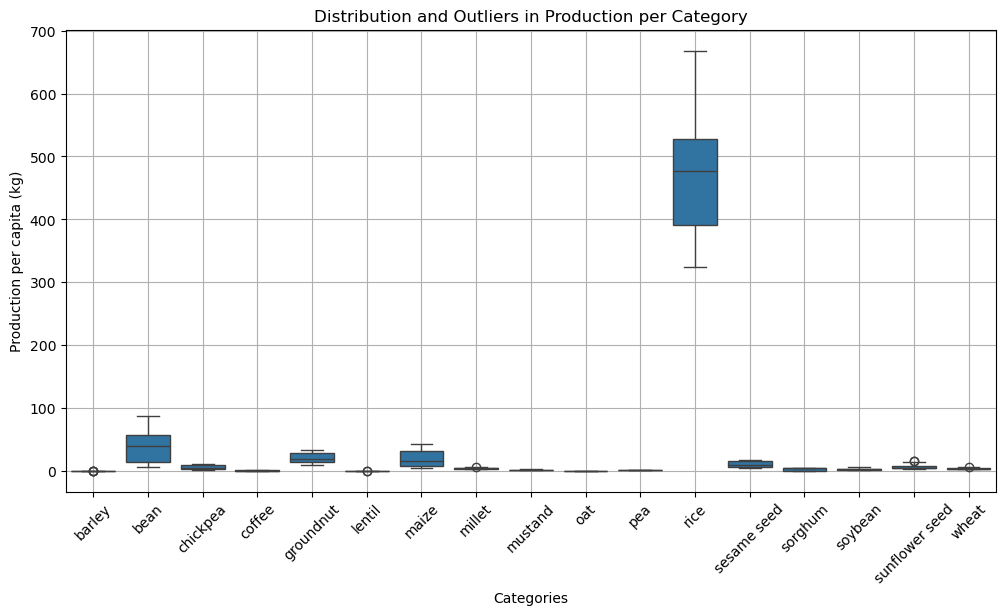

In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Categories', y='Production per capita (kg)', data=df_final)
plt.title('Distribution and Outliers in Production per Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This visualization is showing the data distribution and outliers in production per capita (kg) across different grain categores. Rice and cereal have significatly higer production rates than other grains. 

### Visualization with Barplot

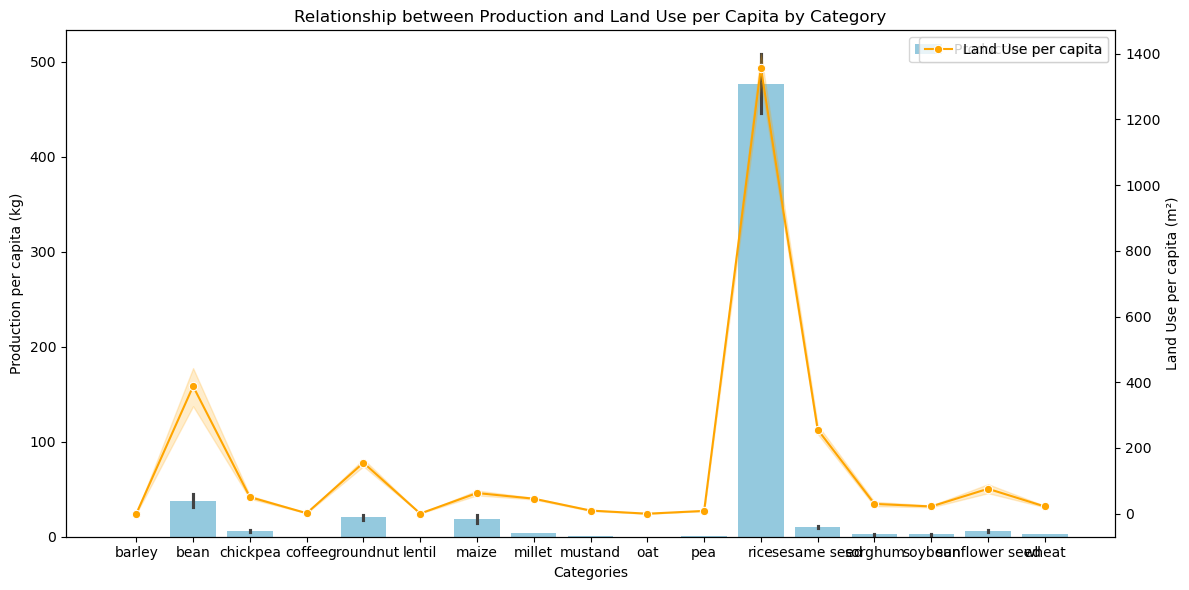

In [84]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_final, x='Categories', y='Production per capita (kg)', color='skyblue', label='Production per capita')
ax2 = plt.twinx() 
sns.lineplot(data=df_final, x='Categories', y='Land Use per capita (m²)', color='orange', label='Land Use per capita', marker='o', ax=ax2)
plt.title('Relationship between Production and Land Use per Capita by Category')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

This is showing relationship between grains production and land Use. Rice is playing a major role in Myanmar agricultural as show output. Millet, sorghum and sunflower seed have low production indicating inefficient farming practices. 

### Visualization with Boxplot

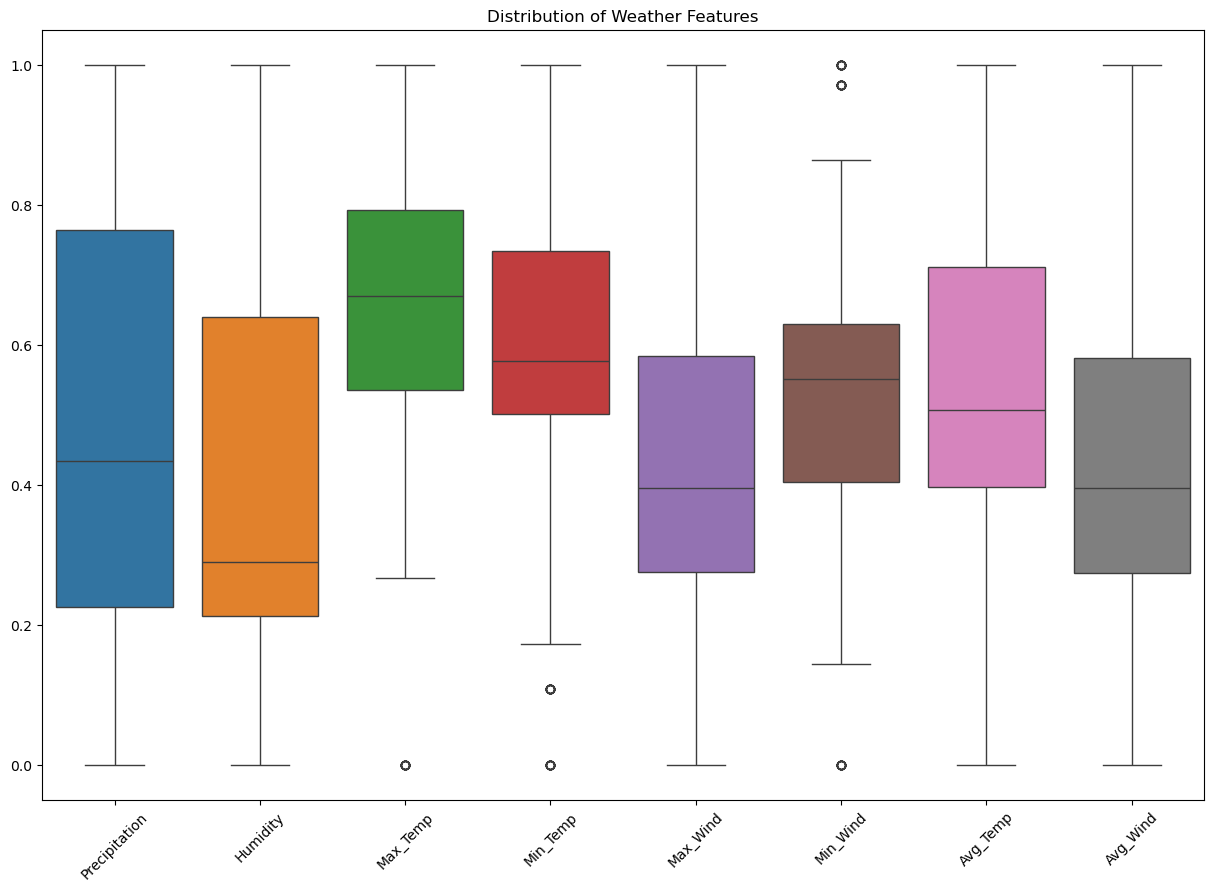

In [85]:
# Boxplot for weather features
weather_features = ['Precipitation', 'Humidity', 'Max_Temp', 'Min_Temp', 'Max_Wind', 'Min_Wind', 'Avg_Temp', 'Avg_Wind']
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_final[weather_features])
plt.xticks(rotation=45)
plt.title('Distribution of Weather Features')
plt.show()

There are a few of outlier in weather data. I ignore them because these are related real world events. Sometimes, weather data can happen extreme events. 

### Visualization using HeatMap

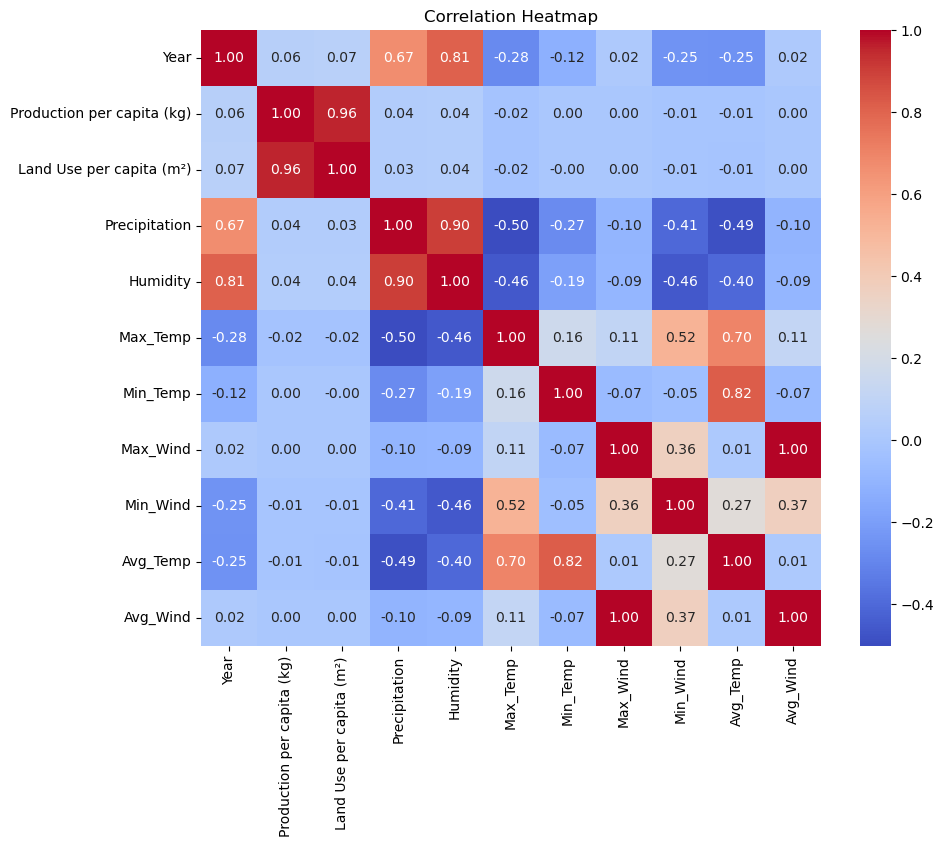

In [86]:
numerical_features = df_final.drop(['Country', 'Categories'], axis=1)

plt.figure(figsize=(10, 8))
correlation = numerical_features.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In the heatmap output, production and land use have high correlation which indicating the higher production requires lager land usage. Production has weak correlations with weather features such as Precipitation, Humidity and Temperature. 

### Encoding Categories feature to create Model 

In [87]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_final['Categories_lable'] = encoder.fit_transform(df_final['Categories'])
df_final

,Country,Year,Production per capita (kg),Categories,Land Use per capita (m²),Precipitation,Humidity,Max_Temp,Min_Temp,Max_Wind,Min_Wind,Avg_Temp,Avg_Wind,Categories_lable
0,Myanmar,1984,0.000000,barley,0.000000,0.508643,0.237807,0.503850,0.606671,0.227641,0.44856,0.438572,0.225783,0
1,Myanmar,1984,9.900485,bean,114.602260,0.508643,0.237807,0.503850,0.606671,0.227641,0.44856,0.438572,0.225783,1
2,Myanmar,1984,4.792775,chickpea,53.678607,0.508643,0.237807,0.503850,0.606671,0.227641,0.44856,0.438572,0.225783,2
3,Myanmar,1984,0.033656,coffee,0.762171,0.508643,0.237807,0.503850,0.606671,0.227641,0.44856,0.438572,0.225783,3
4,Myanmar,1984,14.700534,groundnut,144.845760,0.508643,0.237807,0.503850,0.606671,0.227641,0.44856,0.438572,0.225783,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,Myanmar,2022,14.044581,sesame seed,283.918700,0.939477,0.916692,0.335709,0.537640,0.127906,0.00000,0.258621,0.122916,12
658,Myanmar,2022,3.172183,sorghum,30.752330,0.939477,0.916692,0.335709,0.537640,0.127906,0.00000,0.258621,0.122916,13
659,Myanmar,2022,2.422020,soybean,23.406905,0.939477,0.916692,0.335709,0.537640,0.127906,0.00000,0.258621,0.122916,14
660,Myanmar,2022,3.820456,sunflower seed,41.325735,0.939477,0.916692,0.335709,0.537640,0.127906,0.00000,0.258621,0.122916,15


### Splitting dataset into Training data and Testing data

In [88]:
X = df_final.drop(['Country', 'Categories', 'Production per capita (kg)'], axis=1)
y = df_final['Production per capita (kg)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training using Linear Regression 

In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluation of Linear Regression Model

In [90]:

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 913.8369598355255
R2 Score: 0.8912999374198574
Root Mean Squared Error: 30.229736350744535


 ### Model Training using Random Forest Regression 

In [91]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evlauation of Random Forest Regression

In [92]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 5.652554284528659
R2 Score: 0.9993276338871471
Root Mean Squared Error: 2.37751010187731


### Model Training Gradient Boosting Regression

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluation Gradient Boosting Regression 

In [94]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 6.78170262069796
R2 Score: 0.99919332273516
Root Mean Squared Error: 2.6041702365048947


### Model Training  using SVR 

In [95]:
# Create and fit the SVR model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # RBF kernel is commonly used for non-linear data
svm_model.fit(X_train, y_train)
# Predict on test data
y_pred = svm_model.predict(X_test)


### Evaluation of SVR model 


In [96]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error: 7449.208415083454
R2 Score: 0.11392353726004467
Root Mean Squared Error: 86.30879685804602


### Model training using Decision Tree

In [97]:
# Create and fit the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)  # Set max_depth to control tree size
dt_model.fit(X_train, y_train)
# Predict target values on test data
y_pred = dt_model.predict(X_test)



### Evaluation  Decision Tree


In [98]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error: 70.65993352892522
R2 Score: 0.9915950661506564
Root Mean Squared Error: 8.405946319655225
